## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?



---



If the target/outcome variable is:
- categorical: then we are doing classification (e.g., whether a patient has a disease or not)
- numerical: then we are doing regression (e.g., predicting someone's height)

2. What is a confusion table/matrix? What does it help us understand about a model's performance?


---




 A confusion table/matrix is a table that cross-tabulates the true labels with the predicted ones, and see if they align or not. It evaluates fit and helps us understand whether we're making good or bad predictions.

3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?



---



Accuracy is basically "What proportion of the cases did we predict correctly?" We sum up the number of cases on the "descending diagonal" of the confusion matrix, and divide by the total number of observations to get accuracy. It can be very misleading with imbalanced datasets. For example, if only 5% of patients in a dataset have a disease, a model that always predicts "no disease" would be 95% accurate — but it's completely useless because it never catches a single sick patient.

4. What does the root mean squared error quantify about a particular model?


---



RMSE is the distance from the true values to the predicted ones, weighted by sample size (as n gets large, these values typically approach some fixed value). Basically RMSE measures how far off a model's predictions are from the actual values on average, penalizing larger errors more heavily. For example, being off by 10 is penalized much more than being off by 2 twice. Lower RMSE = better model.

5. What are overfitting and underfitting?


---



 Overfitting is picking k too low, the model is overly sensitive to a handful of data points. The model memorizes the noise and specific details rather than the general pattern. It performs great on training data but poorly on new, unseen data.

 On the other hand, if we pick
 too high, the model averages over many observations and will give answers close to population proportions; this is underfitting. The model is too simple and fails to capture the underlying pattern even in the training data. It performs poorly on both training and new data.

6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?


---




Splitting data into training and testing sets improves model performance because it simulates how the model will perform on real, unseen data. Then by testing different values of k on the test set and picking the one with the best accuracy or RMSE, you're choosing the model that generalizes best rather than the one that just memorized the training data.

7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.


---



Class label as a prediction gives a direct, definitive answer (boolean). This is useful when the target variable is simple, and you need a clear solution. However, we're not directly provided with a direct confidence metric.

Probability distribution provides a solution that gives the likelihood of each target variable(s). We are able to see how confident the model is, and we can easily adjust the threshold based on the confidence. However, a poorly calibrated model might say 95% confidence but be wrong many times.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).


---




In [60]:
! git clone https://github.com/natekim416/scratchpad
%run ./scratchpad/get_data.py

fatal: destination path 'scratchpad' already exists and is not an empty directory.


<Figure size 640x480 with 0 Axes>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/land_mines.csv')

df.describe()

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


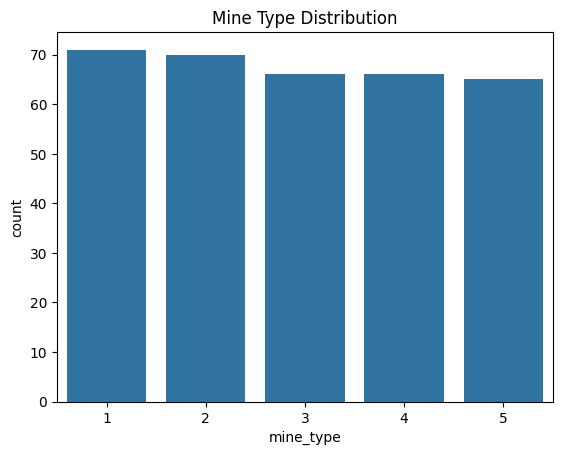

In [62]:
sns.countplot(x='mine_type', data=df)
plt.title('Mine Type Distribution')
plt.show()


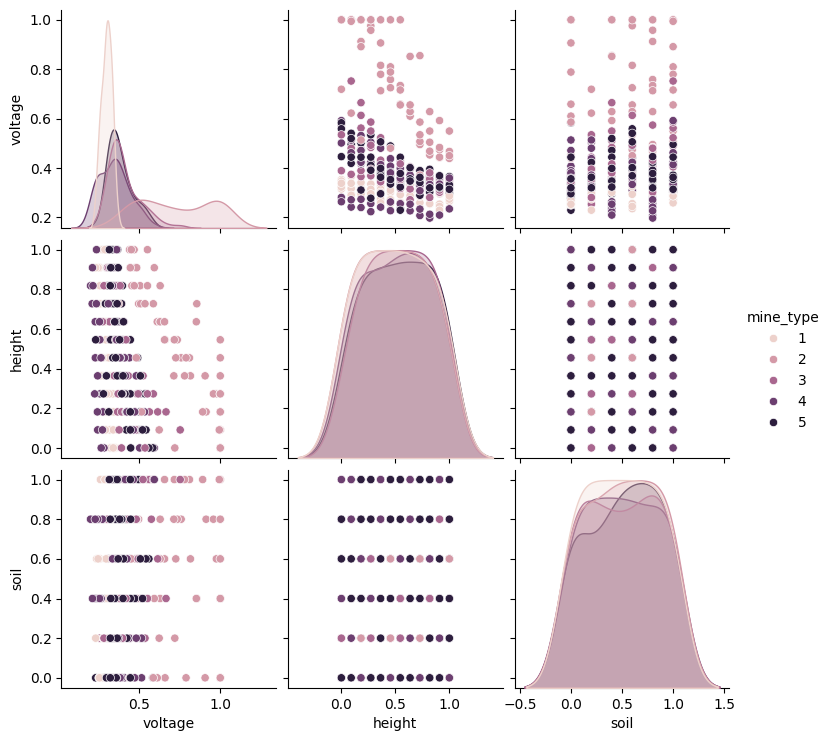

In [63]:
sns.pairplot(df, hue='mine_type', vars=['voltage', 'height', 'soil'])
plt.show()

2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)


---



In [64]:
from sklearn.model_selection import train_test_split

X = df[['voltage', 'height', 'soil']]
y = df['mine_type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 169
Test size: 169


3. Build a $k$-NN classifier. Explain how you select $k$.

---




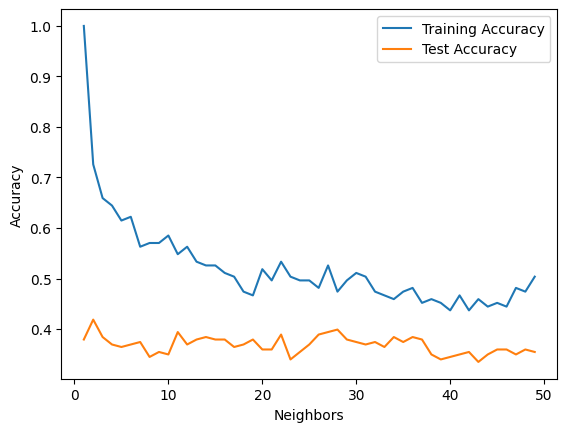

Optimal k: [2]


In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def minmax(x):
    u = (x - min(x)) / (max(x) - min(x))
    return u

y = df['mine_type']
ctrl_list = ['voltage', 'height', 'soil']
x = df.loc[:, ctrl_list]
u = x.apply(minmax)

# 50/50 train-test split with stratify
u_train, u_test, y_train, y_test = train_test_split(u, y,
                                                     test_size=0.6,
                                                     random_state=100,
                                                     stratify=y)

# Loop over all k values to find best k
k_grid = np.array([k for k in range(1, 50)])
test_accuracies = []
train_accuracies = []

for k in k_grid:
    model = KNeighborsClassifier(n_neighbors=k)
    model = model.fit(u_train, y_train)
    test_acc = model.score(u_test, y_test)
    train_acc = model.score(u_train, y_train)
    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)

# Plot train vs test accuracy
sns.lineplot(x=k_grid, y=train_accuracies, label='Training Accuracy').set(xlabel='Neighbors', ylabel='Accuracy')
sns.lineplot(x=k_grid, y=test_accuracies, label='Test Accuracy')
plt.show()

# Find optimal k
test_accuracies = np.array(test_accuracies)
is_optimal = test_accuracies == np.max(test_accuracies)
optimal_indices = np.where(is_optimal)
k_optimal = k_grid[optimal_indices]

model = KNeighborsClassifier(n_neighbors=k_optimal[0])
model = model.fit(u_train, y_train)
y_hat = model.predict(u_test)

print("Optimal k:", k_optimal)

*I selected my K value by iterating through 1-50 and trying each one, trying to find the most optimal k value. KNN didn't work too well for mine types 4 and 5 (and maybe 3) because they have similar values to mine types 1 and 2. Soil didn't really help us classify, a lot of the mines overlapped. Height also had a lot of overlapping. Voltage helped the most but the large cluster of mines 4 and 5 amongst the other types made classifying 4 and 5 harder.*

4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?


In [66]:
print(pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted']))
print("\nTest Accuracy:", model.score(u_test, y_test))

Predicted   1   2   3   4  5
Actual                      
1          31   0   6   3  3
2           0  34   4   4  0
3           9   2  13  11  5
4          17   2  14   6  0
5          13   1  16   8  1

Test Accuracy: 0.4187192118226601


The model achieved an accuracy of 41.87%. This lower accuracy reflects the difficulty and ambiguity of separating 5 mine types with 3 features. Mine types 1 and 2 were classified well and overall accurately. On the other hand, mine types 3, 4, and 5 struggled more signifying that those mine types occupied identical regions in voltage/height/soil feature space.

5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In practice, I would advise someone to be the most certain about type 2 mines. Because the model predicted type 2 mines with the highest accuracy, when mines are classifed to be type 2, they are most likely type 2. However, because of the stakes with mines, I would not 100% trust in and rely on this model. Especially when I see a mine type of 1, 3, 4, and 5. The model's predictions on those mine types were inaccuracte especially with only correctly guessing one 5 mine type. The core problem resides in the fact that types 1, 3, 4, and 5 all bleed into each other. This is primarily prevalent in the voltage feature space.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.


In [67]:
car_df = pd.read_csv('./data/USA_cars_datasets.csv')
car_df = car_df[['price', 'year', 'mileage']]
print(car_df.head())
print(car_df.shape)


   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


2. Maxmin normalize `year` and `mileage`.


In [68]:
def minmax(x):
    u = (x - min(x)) / (max(x) - min(x))
    return u

y = car_df['price']
ctrl_list = ['year', 'mileage']
x = car_df.loc[:, ctrl_list]
u = x.apply(minmax)

3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.


In [69]:
u_train, u_test, y_train, y_test = train_test_split(u, y,
                                                     test_size=0.2,
                                                     random_state=100)

4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?


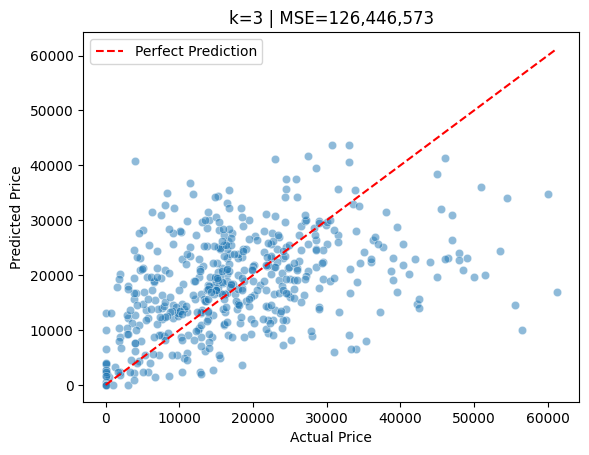

k=3: MSE = 126,446,573.22


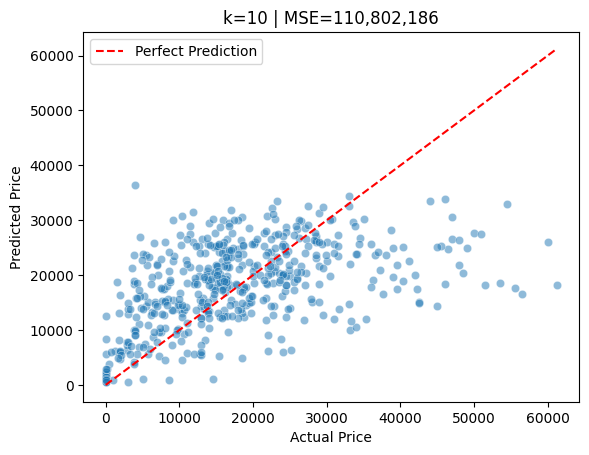

k=10: MSE = 110,802,185.59


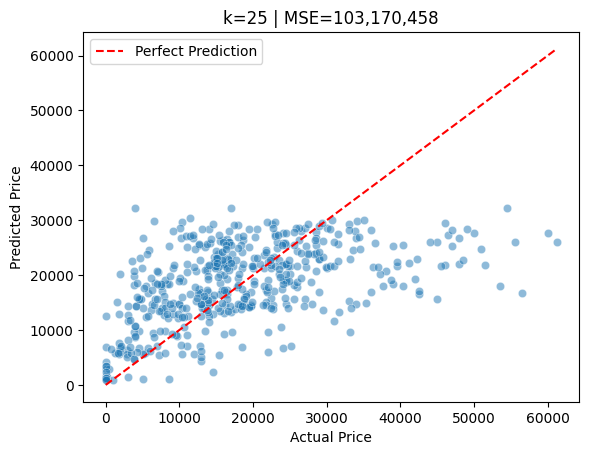

k=25: MSE = 103,170,457.85


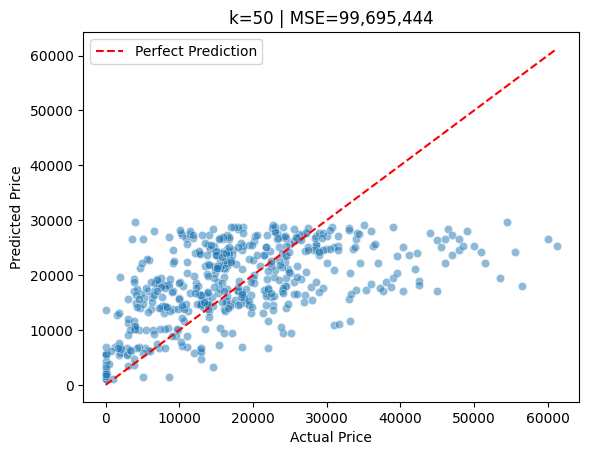

k=50: MSE = 99,695,443.96


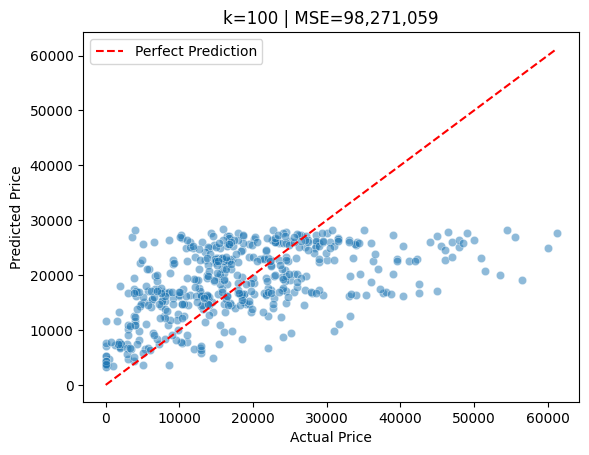

k=100: MSE = 98,271,058.96


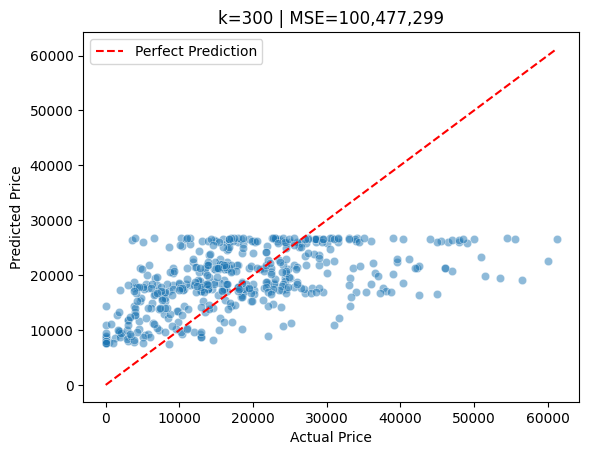

k=300: MSE = 100,477,298.91


In [70]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3, 10, 25, 50, 100, 300]

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(u_train, y_train)
    y_hat = model.predict(u_test)

    mse = mean_squared_error(y_test, y_hat)

    plt.figure()
    sns.scatterplot(x=y_test, y=y_hat, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'k={k} | MSE={mse:,.0f}')
    plt.legend()
    plt.show()

    print(f'k={k}: MSE = {mse:,.2f}')

As you increase K, the predictions are tighter and less variable. Predictions start to cluster towards the mean price. The model starts to over-average across too many neighbors and loses sensitivity to individuals.

5. Determine the optimal $k$ for these data.


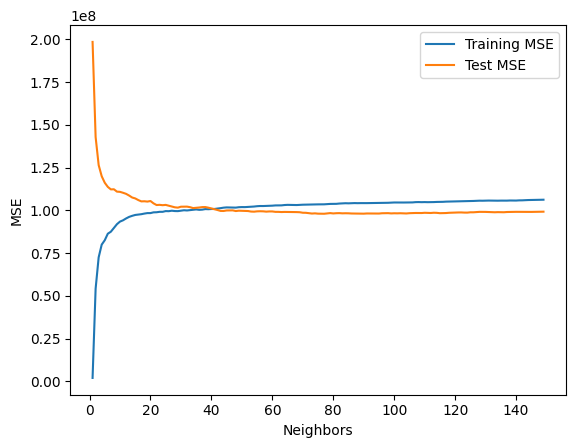

Optimal k: 77
Optimal Test MSE: 97988032.50151458


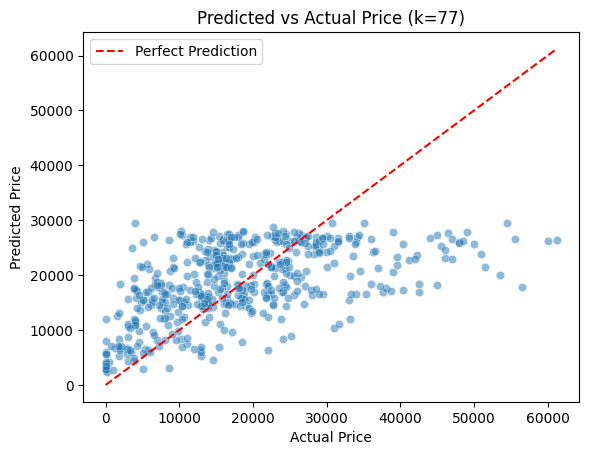

In [71]:
k_grid = np.array([k for k in range(1, 150)])
test_mses = []
train_mses = []

for k in k_grid:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(u_train, y_train)

    train_mse = mean_squared_error(y_train, model.predict(u_train))
    test_mse = mean_squared_error(y_test, model.predict(u_test))

    train_mses.append(train_mse)
    test_mses.append(test_mse)

sns.lineplot(x=k_grid, y=train_mses, label='Training MSE').set(xlabel='Neighbors', ylabel='MSE')
sns.lineplot(x=k_grid, y=test_mses, label='Test MSE')
plt.show()

test_mses = np.array(test_mses)
k_optimal = k_grid[np.argmin(test_mses)]
print(f"Optimal k: {k_optimal}")
print(f"Optimal Test MSE: {test_mses.min()}")

model = KNeighborsRegressor(n_neighbors=k_optimal)
model.fit(u_train, y_train)
y_hat = model.predict(u_test)

plt.figure()
sns.scatterplot(x=y_test, y=y_hat, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Predicted vs Actual Price (k={k_optimal})')
plt.legend()
plt.show()

Looped over k values ranging from 1-150. Then we minimized MSE. The optimal k value is the value at the bottom of the test MSE curve.

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

At small k, the model is overfitting. It is too sensitive to individual training points and misses the underlying relationship between year, mileage, and price. In the predicted vs actual plot, predictions are more erratic and scattered more far from the red diagonal line, especially for higher-priced cars.

At large k, the model is underfitting. It averages over way too many neighbors and the predictions collapse toward the mean price regardless of the actual value. The model essentially predicts the same price for every car and completely ignores variation in year and mileage.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.


In [72]:
heart_df = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')

print(heart_df.isna().sum())

heart_df = heart_df.drop(columns=['time'])

heart_df.head()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


2. Make a correlation matrix. What variables are strongly associated with a death event?


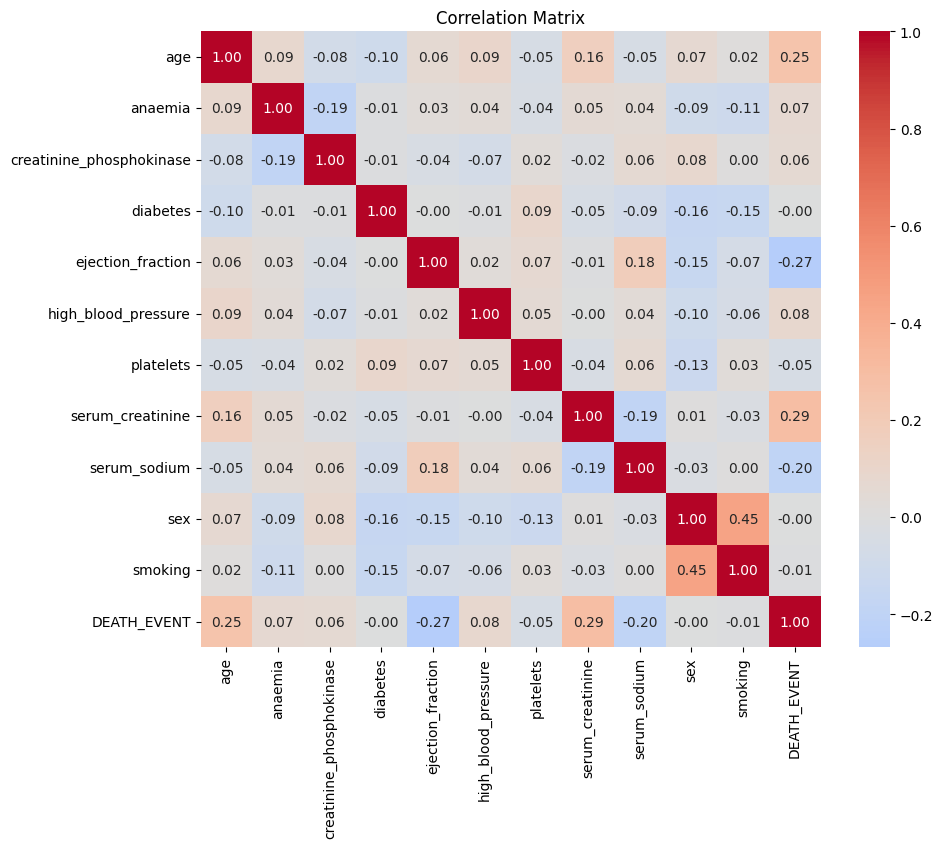

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
Name: DEATH_EVENT, dtype: float64


In [73]:
corr = heart_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

print(corr['DEATH_EVENT'].sort_values(ascending=False))

Serum Creatinine, age, and high blood pressure are the variables most strongly associated with death.

3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?


In [74]:
dummy_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for var in dummy_vars:
    print(heart_df.groupby(var)['DEATH_EVENT'].mean())

anaemia
0    0.294118
1    0.356589
Name: DEATH_EVENT, dtype: float64
diabetes
0    0.321839
1    0.320000
Name: DEATH_EVENT, dtype: float64
high_blood_pressure
0    0.293814
1    0.371429
Name: DEATH_EVENT, dtype: float64
sex
0    0.323810
1    0.319588
Name: DEATH_EVENT, dtype: float64
smoking
0    0.325123
1    0.312500
Name: DEATH_EVENT, dtype: float64


Only anaemia and high blood pressure have a higher proportion of the popoulation that dies when the variable takes 1 rather than 0

4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.


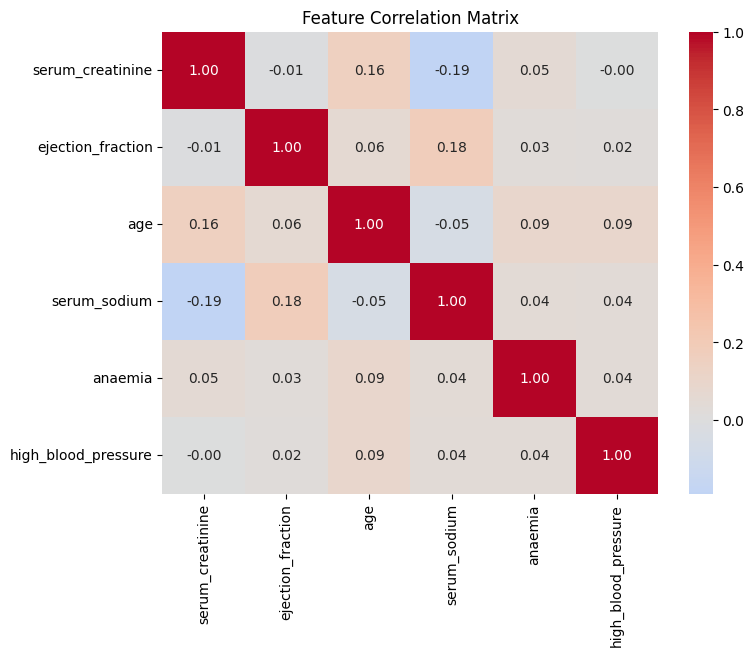

In [82]:
y = heart_df['DEATH_EVENT']

ctrl_list = ['serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium',
             'anaemia', 'high_blood_pressure']

x = heart_df.loc[:, ctrl_list]

plt.figure(figsize=(8, 6))
sns.heatmap(x.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

Serum creatinine (0.29) and ejection fraction (-0.27) — the two strongest  predictors from the first correlation matrix

Age (0.25) and serum sodium (-0.20) - second most correlated continuous variables

High blood pressure and anaemia — the only two binary variables that showed a meaningfully higher death rate at value 1 (37.1% and 35.7% respectively) from previous question

5. Maxmin normalize all of the variables in `X`.


In [76]:
y = heart_df['DEATH_EVENT']

ctrl_list = ['serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium',
             'anaemia', 'high_blood_pressure']

x = heart_df.loc[:, ctrl_list]
u = x.apply(minmax)
print(u.describe())
u.head()

       serum_creatinine  ejection_fraction         age  serum_sodium  \
count        299.000000         299.000000  299.000000    299.000000   
mean           0.100436           0.364903    0.378798      0.675012   
std            0.116237           0.179316    0.216269      0.126071   
min            0.000000           0.000000    0.000000      0.000000   
25%            0.044944           0.242424    0.200000      0.600000   
50%            0.067416           0.363636    0.363636      0.685714   
75%            0.101124           0.469697    0.545455      0.771429   
max            1.000000           1.000000    1.000000      1.000000   

          anaemia  high_blood_pressure  
count  299.000000           299.000000  
mean     0.431438             0.351171  
std      0.496107             0.478136  
min      0.000000             0.000000  
25%      0.000000             0.000000  
50%      0.000000             0.000000  
75%      1.000000             1.000000  
max      1.000000      

,serum_creatinine,ejection_fraction,age,serum_sodium,anaemia,high_blood_pressure
0,0.157303,0.090909,0.636364,0.485714,0.0,1.0
1,0.067416,0.363636,0.272727,0.657143,0.0,0.0
2,0.089888,0.090909,0.454545,0.457143,0.0,0.0
3,0.157303,0.090909,0.181818,0.685714,1.0,0.0
4,0.247191,0.090909,0.454545,0.085714,1.0,0.0


6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).


In [77]:
u_train, u_test, y_train, y_test = train_test_split(u, y,
                                                     test_size=0.2,
                                                     random_state=100,
                                                     stratify=y)

print("Training size:", u_train.shape[0])
print("Test size:", u_test.shape[0])

Training size: 239
Test size: 60


7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.


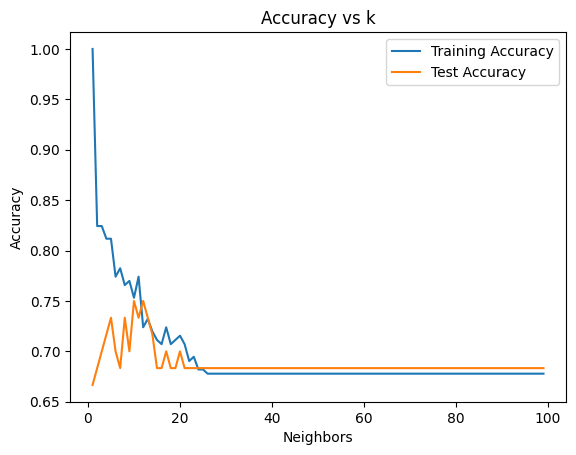

Optimal k: 10, Test Accuracy: 0.750


In [78]:
k_grid = np.array([k for k in range(1, 100)])
test_accuracies = []
train_accuracies = []

for k in k_grid:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(u_train, y_train)
    test_accuracies.append(model.score(u_test, y_test))
    train_accuracies.append(model.score(u_train, y_train))

sns.lineplot(x=k_grid, y=train_accuracies, label='Training Accuracy').set(xlabel='Neighbors', ylabel='Accuracy')
sns.lineplot(x=k_grid, y=test_accuracies, label='Test Accuracy')
plt.title('Accuracy vs k')
plt.show()

test_accuracies = np.array(test_accuracies)
k_optimal = k_grid[np.argmax(test_accuracies)]
print(f"Optimal k: {k_optimal}, Test Accuracy: {np.max(test_accuracies):.3f}")

model = KNeighborsClassifier(n_neighbors=k_optimal)
model.fit(u_train, y_train)
y_hat = model.predict(u_test)

8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

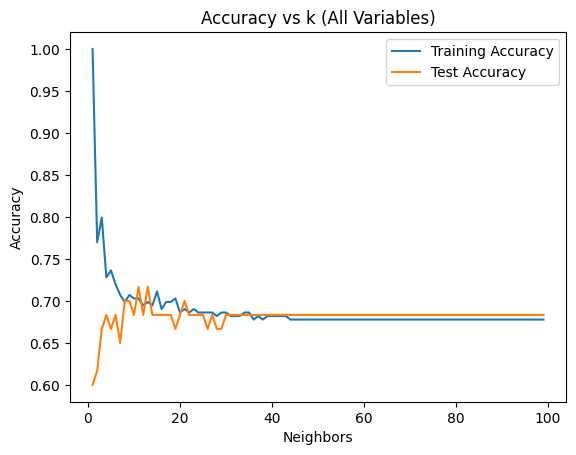

Optimal k (all variables): 11, Test Accuracy: 0.717

Selected features MSE:  0.2500
All features MSE:       0.2833

Selected features Accuracy: 0.750
All features Accuracy:      0.717


In [79]:
y = heart_df['DEATH_EVENT']
x_all = heart_df.drop(columns=['DEATH_EVENT'])
u_all = x_all.apply(minmax)

u_all_train, u_all_test, y_train, y_test = train_test_split(u_all, y,
                                                             test_size=0.2,
                                                             random_state=100,
                                                             stratify=y)

k_grid = np.array([k for k in range(1, 100)])
test_accuracies_all = []
train_accuracies_all = []

for k in k_grid:
    model_all = KNeighborsClassifier(n_neighbors=k)
    model_all.fit(u_all_train, y_train)
    test_accuracies_all.append(model_all.score(u_all_test, y_test))
    train_accuracies_all.append(model_all.score(u_all_train, y_train))

sns.lineplot(x=k_grid, y=train_accuracies_all, label='Training Accuracy').set(xlabel='Neighbors', ylabel='Accuracy')
sns.lineplot(x=k_grid, y=test_accuracies_all, label='Test Accuracy')
plt.title('Accuracy vs k (All Variables)')
plt.show()

test_accuracies_all = np.array(test_accuracies_all)
k_optimal_all = k_grid[np.argmax(test_accuracies_all)]
print(f"Optimal k (all variables): {k_optimal_all}, Test Accuracy: {np.max(test_accuracies_all):.3f}")

model_all = KNeighborsClassifier(n_neighbors=k_optimal_all)
model_all.fit(u_all_train, y_train)
y_hat_all = model_all.predict(u_all_test)

from sklearn.metrics import mean_squared_error
mse_selected = mean_squared_error(y_test, y_hat)
mse_all = mean_squared_error(y_test, y_hat_all)

print(f"\nSelected features MSE:  {mse_selected:.4f}")
print(f"All features MSE:       {mse_all:.4f}")
print(f"\nSelected features Accuracy: {model.score(u_test, y_test):.3f}")
print(f"All features Accuracy:      {model_all.score(u_all_test, y_test):.3f}")

In [86]:
variable_sets = {
    'All variables': ['serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium', 'anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking', 'platelets', 'creatinine_phosphokinase'],
    'Selected (6)': ['serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium', 'anaemia', 'high_blood_pressure'],
    'Top 2 only': ['serum_creatinine', 'ejection_fraction'],
    'Top 4 only': ['serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium']
}

for name, cols in variable_sets.items():
    x_temp = heart_df.loc[:, cols].apply(minmax)
    x_tr, x_te, y_tr, y_te = train_test_split(x_temp, y, test_size=0.2, random_state=100, stratify=y)
    model_temp = KNeighborsClassifier(n_neighbors=k_optimal)
    model_temp.fit(x_tr, y_tr)
    mse = mean_squared_error(y_te, model_temp.predict(x_te))
    rmse = np.sqrt(mse)
    acc = model_temp.score(x_te, y_te)
    print(f"{name} RMSE: {rmse:}  Accuracy: {acc:}")

All variables RMSE: 0.5627314338711378  Accuracy: 0.6833333333333333
Selected (6) RMSE: 0.5  Accuracy: 0.75
Top 2 only RMSE: 0.4281744192888376  Accuracy: 0.8166666666666667
Top 4 only RMSE: 0.5627314338711378  Accuracy: 0.6833333333333333


The selected-feature model outperforms the full model. The selected-feature achieves a higher accuracy (75.0% vs 71.7%) and a lower MSE (0.250 vs 0.283).


I would prefer to use the selected-feature model as it is more accurate, simpler, and more interpretable. In a real setting, a doctor needs to understand why a patient is flagged as high risk. A model built on well-understood indicators like ejection fraction and serum creatinine is much more easier to explain and trust than one using all variables randomly.

We can see from the variable selection that the inclusion of serum creatinine, ejection fraction, age, and serum sodium provide the basis for the model's accuracy. Once we add other variables, it will either increase or decrease the accuracy. In this case, more variables are not always better.